# Spotify Data Analysis

### Auth

First, we need to save our credentials (client_id and client_secret) into a credentials.py in the same folder

In [1]:
import spotipy
import credentials

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=credentials.client_id,client_secret=credentials.client_secret)

In [4]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Gathering the data

Next, using the spotify API we need to gather the data about the artist we want to analyze

The following function returns all of the tracks of a list of artists

In [15]:
def get_artist_tracks(artists):
    tracks = []
    
    
        
    for artist in artists:
        
        try:
            
            # Get the artist URI (a unique ID)
            artist_uri = sp.search(artist)['tracks']['items'][0]['artists'][0]['uri']

            # Spotify has a lot of duplicate albums, but we'll cross-reference them with this list to avoid extra loops
            album_checker = []

            # The starting point of our loop of albums for those artists with more than 50
            n = 0

            # Note the album_type = 'album'. This discounts singles, compilations and collaborations
            while len(sp.artist_albums(artist_uri, album_type = 'album', limit=50, offset = n)['items']) > 0:

                # Avoid overloading Spotify with requests by assigning the list of album dictionaries to a variable
                dict_list = sp.artist_albums(artist_uri, album_type = 'album', limit=50, offset = n)['items']

                for i, album in list(enumerate(dict_list)):

                    # Add the featured artists for the album in question to the checklist
                    check_this_album = [j['name'] for j in dict_list[i]['artists']]
                    # And the album name
                    check_this_album.append(dict_list[i]['name'])
                    # And its date
                    check_this_album.append(dict_list[i]['release_date'])

                    # Only continue looping if that album isn't in the checklist
                    if check_this_album not in album_checker:

                        # Add this album to the checker
                        album_checker.append(check_this_album)
                        # For every song on the album, get its descriptors and features in a list and add to the tracklist
                        tracks.extend([[artist, album['name'], album['uri'], song['name'],

                          album['release_date']] + list(sp.audio_features(song['uri'])[0].values()) 
                                       for song in sp.album_tracks(album['uri'])['items']])

                # Go through the next 50 albums (otherwise we'll get an infinite while loop)
                n += 50
        except Exception as ex:
                print(ex)

    return tracks
    
        

So now we need to set our list of artists

We are going to use the Top Global Charts Playlist from spotify to extract the top 50 artists

In [6]:
lollapalooza = sp.playlist_tracks('1G0DNLX6Xhi7WMqdd1QJNp',market='AR')

In [7]:
lolla_artist = list(lollapalooza['items'])

In [8]:
lolla_artist[0]['track']['artists'][0]['name']

"Guns N' Roses"

In [9]:
top_artists = []
for artist in lolla_artist:
    print(artist['track']['artists'][0]['name'])
    top_artists.append(artist['track']['artists'][0]['name'])   

Guns N' Roses
Guns N' Roses
Guns N' Roses
Guns N' Roses
Guns N' Roses
Guns N' Roses
Guns N' Roses
Travis Scott
Travis Scott
Travis Scott
Travis Scott
Travis Scott
Travis Scott
Travis Scott
The Strokes
The Strokes
The Strokes
The Strokes
The Strokes
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Lana Del Rey
Martin Garrix
Martin Garrix
Martin Garrix
Martin Garrix
Martin Garrix
Martin Garrix
Martin Garrix
Gwen Stefani
Gwen Stefani
Gwen Stefani
Gwen Stefani
Anna Kendrick
Gwen Stefani
Zooey Deschanel
Armin van Buuren
Marco Borsato
Armin van Buuren
Armin van Buuren
Armin van Buuren
Armin van Buuren
Dimitri Vegas & Like Mike
Armin van Buuren
Vampire Weekend
Vampire Weekend
Vampire Weekend
Vampire Weekend
Vampire Weekend
Vampire Weekend
Vampire Weekend
Cage The Elephant
Cage The Elephant
Cage The Elephant
Cage The Elephant
Cage The Elephant
Cage The Elephant
Cage The Elephant
Jay Rock
James Blake
James Blake
Ja

In [12]:
lolla_artists =["Guns N' Roses","Travis Scott","The Strokes","Lana Del Rey",
             "Martin Garrix","Gwen Stefani","Armin Van Buuren","Vampire Weekend",
             "Cage The Elephant","James Blake","Brockhampton","Alan Walker",
             "Illenium","Rezz","Ratones Paranoicos","Duki","The Lumineers",
             "Kacey Musgraves","Rex Organge County","Rita Ora","A Day To Remebmber",
             "Charli XCX","Perry Farrell","Madeon","King Princess","LP","Jaden Smith",
              "Litto Nebbia","Hayley Kiyoko","Wos","Lauv","Airbag","El mato a un policia motorizado"
              "Nathy Peluso","Rels B","Emmanuel Horvilleur","Denzel Curry","Kali Uchis",
              "Paloma Mami","Mika","Chris Lake","R3HAB","J Mena","Yungblud","Louta",
              "Pablo Vittar","YSY A","Bizarrap","AJR","Two Feet","Fabiana Cantilo","San Holo",
              "Fuego","Emilia","Yung Beef","Idles","Trueno","DANI","Wallows","Masego",
              "La Delio Valdez","The Hu","Kaydy Cain","Zoe Gotusso","Elsa y Elmar","Girl Ultra",
              "Natalie Perez","Las Ligas Menores","Maye","Ainda","Ghetto Kids","Goldfish","Cimafunk",
              "Boombox Cartel","Ms Nina","Feli Colina","D3FAI","Florian","Lucia Tacchetti",
              "Axel Fiks","Miranda Johansen","Paco Leiva","Dabow","Metro Live","Dj Sky","Limon"]
              

Now that we got our artist we are going to use the function prevously defined

In [12]:
## This line may take a while

In [16]:
tracks = get_artist_tracks(lolla_artists)

'NoneType' object has no attribute 'values'
'NoneType' object has no attribute 'values'
list index out of range


In [14]:
tracks

[['The Weeknd',
  'My Dear Melancholy,',
  'spotify:album:4qZBW3f2Q8y0k1A84d4iAO',
  'Call Out My Name',
  '2018-03-30',
  0.461,
  0.593,
  1,
  -4.954,
  1,
  0.0356,
  0.17,
  0,
  0.307,
  0.175,
  134.17,
  'audio_features',
  '09mEdoA6zrmBPgTEN5qXmN',
  'spotify:track:09mEdoA6zrmBPgTEN5qXmN',
  'https://api.spotify.com/v1/tracks/09mEdoA6zrmBPgTEN5qXmN',
  'https://api.spotify.com/v1/audio-analysis/09mEdoA6zrmBPgTEN5qXmN',
  228373,
  3],
 ['The Weeknd',
  'My Dear Melancholy,',
  'spotify:album:4qZBW3f2Q8y0k1A84d4iAO',
  'Try Me',
  '2018-03-30',
  0.456,
  0.679,
  8,
  -5.778,
  0,
  0.064,
  0.596,
  0.000573,
  0.129,
  0.107,
  92.026,
  'audio_features',
  '4ppTAJUbNXELZcoUaL90wo',
  'spotify:track:4ppTAJUbNXELZcoUaL90wo',
  'https://api.spotify.com/v1/tracks/4ppTAJUbNXELZcoUaL90wo',
  'https://api.spotify.com/v1/audio-analysis/4ppTAJUbNXELZcoUaL90wo',
  221107,
  4],
 ['The Weeknd',
  'My Dear Melancholy,',
  'spotify:album:4qZBW3f2Q8y0k1A84d4iAO',
  'Wasted Times',
  '201

In [17]:
len(tracks)

6927

In [20]:
audio_ft = list(sp.audio_features('7tr2za8SQg2CI8EDgrdtNl')[0].keys())

In [21]:
df_columns = ['artist','album_name','album_uri','track','release_date'] + audio_ft

df_columns

['artist',
 'album_name',
 'album_uri',
 'track',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [22]:
import pandas as pd

df = pd.DataFrame(tracks, columns=df_columns)

In [23]:
df

,artist,album_name,album_uri,track,release_date,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Guns N' Roses,Chinese Democracy,spotify:album:0suNLpB9xraAv1FcdlITjQ,Chinese Democracy,2008-01-01,0.474,0.800,2,-10.472,1,...,0.131,0.156,133.940,audio_features,0zoK1L5JxJbyk7T2nw367B,spotify:track:0zoK1L5JxJbyk7T2nw367B,https://api.spotify.com/v1/tracks/0zoK1L5JxJby...,https://api.spotify.com/v1/audio-analysis/0zoK...,283213,4
1,Guns N' Roses,Chinese Democracy,spotify:album:0suNLpB9xraAv1FcdlITjQ,Shackler's Revenge,2008-01-01,0.524,0.787,1,-9.411,0,...,0.277,0.561,132.053,audio_features,0S9eOzGwLHUwmjYvB5jG4x,spotify:track:0S9eOzGwLHUwmjYvB5jG4x,https://api.spotify.com/v1/tracks/0S9eOzGwLHUw...,https://api.spotify.com/v1/audio-analysis/0S9e...,216600,4
2,Guns N' Roses,Chinese Democracy,spotify:album:0suNLpB9xraAv1FcdlITjQ,Better,2008-01-01,0.563,0.784,1,-9.234,0,...,0.895,0.387,98.011,audio_features,3nW5v0Htr1ySk8czTJIA2V,spotify:track:3nW5v0Htr1ySk8czTJIA2V,https://api.spotify.com/v1/tracks/3nW5v0Htr1yS...,https://api.spotify.com/v1/audio-analysis/3nW5...,297227,4
3,Guns N' Roses,Chinese Democracy,spotify:album:0suNLpB9xraAv1FcdlITjQ,Street Of Dreams,2008-01-01,0.362,0.657,6,-8.072,1,...,0.090,0.180,170.572,audio_features,2iFkNf2prxUIIGEOEK7yd1,spotify:track:2iFkNf2prxUIIGEOEK7yd1,https://api.spotify.com/v1/tracks/2iFkNf2prxUI...,https://api.spotify.com/v1/audio-analysis/2iFk...,286347,4
4,Guns N' Roses,Chinese Democracy,spotify:album:0suNLpB9xraAv1FcdlITjQ,If The World,2008-01-01,0.634,0.747,7,-9.380,1,...,0.115,0.819,146.483,audio_features,5nVL5zL17GndMM1jt7VUme,spotify:track:5nVL5zL17GndMM1jt7VUme,https://api.spotify.com/v1/tracks/5nVL5zL17Gnd...,https://api.spotify.com/v1/audio-analysis/5nVL...,293520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,Limon,Aqui,spotify:album:02FnxsRIsjpfiRxv5PCpNJ,Recuerdo Perdido,1998,0.667,0.433,10,-9.939,0,...,0.125,0.309,135.189,audio_features,5JQwQFng9nZiTpPexOyOVh,spotify:track:5JQwQFng9nZiTpPexOyOVh,https://api.spotify.com/v1/tracks/5JQwQFng9nZi...,https://api.spotify.com/v1/audio-analysis/5JQw...,296667,3
6923,Limon,Aqui,spotify:album:02FnxsRIsjpfiRxv5PCpNJ,Andamos Huyendo,1998,0.560,0.702,11,-7.310,0,...,0.258,0.573,102.878,audio_features,1EymznGTuwDVO1yoz3tjoH,spotify:track:1EymznGTuwDVO1yoz3tjoH,https://api.spotify.com/v1/tracks/1EymznGTuwDV...,https://api.spotify.com/v1/audio-analysis/1Eym...,226867,3
6924,Limon,Aqui,spotify:album:02FnxsRIsjpfiRxv5PCpNJ,Quitar a Otras,1998,0.425,0.129,7,-12.690,0,...,0.160,0.242,93.489,audio_features,6dFe6mFZOhJOTYfR5P2mto,spotify:track:6dFe6mFZOhJOTYfR5P2mto,https://api.spotify.com/v1/tracks/6dFe6mFZOhJO...,https://api.spotify.com/v1/audio-analysis/6dFe...,278733,4
6925,Limon,Aqui,spotify:album:02FnxsRIsjpfiRxv5PCpNJ,Sabiéndose de los Descalzos,1998,0.599,0.369,2,-11.522,1,...,0.086,0.380,110.622,audio_features,7LibUqaRLWRbLZKUQtFL7u,spotify:track:7LibUqaRLWRbLZKUQtFL7u,https://api.spotify.com/v1/tracks/7LibUqaRLWRb...,https://api.spotify.com/v1/audio-analysis/7Lib...,181573,3


In [24]:
df['artist'].value_counts()

Litto Nebbia          1180
Jaden Smith            331
Ratones Paranoicos     317
DANI                   253
Miranda Johansen       237
                      ... 
YSY A                   10
Cimafunk                 8
Paco Leiva               8
Travis Scott             7
Goldfish                 7
Name: artist, Length: 73, dtype: int64

In [25]:
df_artist = df.groupby('artist').mean()

In [26]:
df_artist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
A Day To Remebmber,0.365390,0.891158,4.657534,-5.636226,0.630137,0.145750,0.037929,2.423543e-02,0.297775,0.357557,139.401123,210860.123288,3.938356
AJR,0.584638,0.588223,5.606383,-6.998064,0.776596,0.179807,0.253469,1.011191e-02,0.239648,0.545957,111.897638,205571.489362,3.861702
Ainda,0.642702,0.796842,4.315789,-3.614965,0.842105,0.057707,0.361986,7.982456e-08,0.553579,0.689912,137.192649,175625.122807,3.964912
Airbag,0.408025,0.576693,5.138365,-9.834704,0.591195,0.054963,0.313550,3.944460e-01,0.202177,0.286009,119.115365,260713.201258,3.886792
Alan Walker,0.534304,0.620009,5.304348,-6.805174,0.565217,0.057900,0.229801,1.185793e-01,0.183639,0.264039,130.642609,182734.608696,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallows,0.501091,0.698727,5.909091,-6.445909,0.545455,0.041982,0.020273,9.373129e-02,0.349818,0.459727,127.073182,211962.454545,4.000000
Wos,0.617612,0.619612,4.477612,-5.840463,0.597015,0.073096,0.306481,9.423138e-03,0.141563,0.347000,121.890940,209971.164179,4.014925
YSY A,0.779500,0.732600,5.800000,-5.375700,0.600000,0.129590,0.274960,7.845400e-05,0.209580,0.630900,106.497000,195751.400000,3.900000


In [27]:
df_artist.drop(columns=['time_signature'],inplace=True)

In [28]:
df_artist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
artist,,,,,,,,,,,,
A Day To Remebmber,0.365390,0.891158,4.657534,-5.636226,0.630137,0.145750,0.037929,2.423543e-02,0.297775,0.357557,139.401123,210860.123288
AJR,0.584638,0.588223,5.606383,-6.998064,0.776596,0.179807,0.253469,1.011191e-02,0.239648,0.545957,111.897638,205571.489362
Ainda,0.642702,0.796842,4.315789,-3.614965,0.842105,0.057707,0.361986,7.982456e-08,0.553579,0.689912,137.192649,175625.122807
Airbag,0.408025,0.576693,5.138365,-9.834704,0.591195,0.054963,0.313550,3.944460e-01,0.202177,0.286009,119.115365,260713.201258
Alan Walker,0.534304,0.620009,5.304348,-6.805174,0.565217,0.057900,0.229801,1.185793e-01,0.183639,0.264039,130.642609,182734.608696
...,...,...,...,...,...,...,...,...,...,...,...,...
Wallows,0.501091,0.698727,5.909091,-6.445909,0.545455,0.041982,0.020273,9.373129e-02,0.349818,0.459727,127.073182,211962.454545
Wos,0.617612,0.619612,4.477612,-5.840463,0.597015,0.073096,0.306481,9.423138e-03,0.141563,0.347000,121.890940,209971.164179
YSY A,0.779500,0.732600,5.800000,-5.375700,0.600000,0.129590,0.274960,7.845400e-05,0.209580,0.630900,106.497000,195751.400000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_artist)
y_kmeans = kmeans.predict(df_artist)

In [28]:
df_artist.to_csv('top50data.csv')

In [3]:
df_artist = pd.read_csv('top50data.csv')

In [5]:
df_artist.head()

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Bad Bunny,0.746023,0.679419,4.627907,-5.783140,0.511628,0.119923,0.195063,0.000181,0.154300,0.523581,121.808558,210723.976744
1,Billie Eilish,0.583786,0.281721,5.000000,-15.085071,0.714286,0.193086,0.656857,0.120693,0.239307,0.288007,105.494286,183947.642857
2,Black Eyed Peas,0.777581,0.673301,5.764192,-6.489314,0.441048,0.166291,0.106052,0.008263,0.246169,0.592969,110.402162,261998.930131
3,Camila Cabello,0.619320,0.536280,4.960000,-6.122320,0.560000,0.085424,0.329892,0.000169,0.145332,0.420684,112.847280,201105.520000
4,Doja Cat,0.721684,0.640158,4.561404,-5.728298,0.701754,0.088316,0.159661,0.001901,0.159854,0.398649,126.991421,209294.017544


In [31]:
from sklearn.preprocessing import OneHotEncoder


In [32]:
ohe = OneHotEncoder()


In [33]:
 X = ohe.fit_transform(df_artist)

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X)

In [35]:
centroids = kmeans.cluster_centers_

In [36]:
from sklearn.decomposition import TruncatedSVD

In [37]:
svd = TruncatedSVD(n_components=3)

In [38]:
X_reduced = svd.fit_transform(X)
X_reduced

array([[ 3.01686448e-02,  5.87070765e-03, -1.58452389e-01],
       [-1.29978770e-03, -2.01109590e-02, -4.30372827e-03],
       [-2.83469752e-03,  1.12015588e-02,  1.29497076e-01],
       [-1.17279153e-02, -2.21717520e-02,  8.34087695e-02],
       [-9.19668403e-03,  7.36115577e-03,  1.41228388e-01],
       [ 1.25901277e-02, -7.12980526e-03,  4.65821394e-01],
       [-5.90003557e-03, -5.77017160e-03,  5.54271034e-02],
       [ 9.34557806e-03, -6.37126944e-02,  7.45990864e-01],
       [-4.58974261e-03, -1.17951141e-02,  1.57286150e-01],
       [ 3.77540966e-03, -2.01828315e-02, -2.09045870e-01],
       [-2.36504755e-03, -3.55129500e-02, -3.52195430e-01],
       [-3.47056893e-03,  1.11672738e-02,  4.96399065e-01],
       [ 7.83836397e-03, -9.94396863e-03,  1.62664117e-01],
       [-1.59902137e-02,  1.15457764e-02,  1.17141575e-01],
       [-2.23131373e-02, -1.86310180e-02,  1.29487369e-01],
       [-1.24910790e-02, -5.26583353e-03,  3.26949401e-01],
       [ 2.58992713e-04,  1.16742335e-02

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X_reduced)

In [40]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.43815179e-04 -6.08844995e-03 -7.55162005e-02]
 [ 9.78035420e-01  3.31379714e+00 -6.61599569e-03]
 [ 3.32037997e+00 -9.76153349e-01 -1.27895088e-03]
 [-2.02552318e-03 -1.89775812e-03  6.30676742e-01]]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

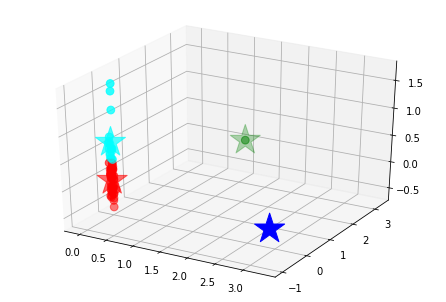

In [42]:
# Predicting the clusters
labels = kmeans.predict(X_reduced)
#Getting the cluster centers

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2], marker='*', c=colores, s=1000)